In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import numpy.random as rn
import networkx as nx
import my_networkx as my_nx
import frame as frame
from numba import njit, prange

mpl.rcParams.update({'font.size': 25})

In [2]:
# size of network
N = 6

# adjacency matrix
A = np.array([[0, 1, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0]])
frame.printMatrix(A)

0.00   1.00   0.00   1.00   1.00   0.00   

1.00   0.00   1.00   0.00   0.00   1.00   

0.00   1.00   0.00   0.00   0.00   0.00   

1.00   0.00   0.00   0.00   0.00   0.00   

1.00   0.00   0.00   0.00   0.00   1.00   

0.00   1.00   0.00   0.00   1.00   0.00   



In [3]:
# master operator, values from Rick in SuppMat
L = np.zeros((N, N))
# fill with values
L[0, 1] = 5.997
L[1, 0] = 0.774

L[0, 3] = 13.439
L[3, 0] = 127.968

L[0, 4] = 15.330
L[4, 0] = 0.121

L[4, 5] = 3.749
L[5, 4] = 13.326

L[1, 2] = 1514.820
L[2, 1] = 53.0661

L[1, 5] = 13.441
L[5, 1] = 2.922

L = L.T

#diagonal elements
for i in range(N):
    L[i,i] = -np.sum(L[:, i])


frame.printMatrix(L)

-34.77   0.77   0.00   127.97   0.12   0.00   

6.00   -1529.03   53.07   0.00   0.00   2.92   

0.00   1514.82   -53.07   0.00   0.00   0.00   

13.44   0.00   0.00   -127.97   0.00   0.00   

15.33   0.00   0.00   0.00   -3.87   13.33   

0.00   13.44   0.00   0.00   3.75   -16.25   



In [4]:
# find eigenvalues and eigenvectors
ew, ev = sc.linalg.eig(L)
print(ew)
# frame.printMatrix(ev)

# relevant eigenvector has eigenvalue 0
peq = ev[:, 4]
# print(peq)

# need to "normalise" it such that sum of entries is 1

Z = np.sum(peq)
# print(Z)
peq = peq / Z

print(np.sum(peq))

print(peq)

print(np.sort(np.abs(ew)))

[-1.58165132e+03+0.j -1.43749631e+02+0.j -1.98531625e+01+0.j
 -1.86991129e+01+0.j  7.96596241e-15+0.j -9.99871767e-01+0.j]
0.9999999999999998
[2.54859615e-03 1.97475509e-02 5.63711767e-01 2.67649597e-04
 3.22886823e-01 9.08376128e-02]
[7.96596241e-15 9.99871767e-01 1.86991129e+01 1.98531625e+01
 1.43749631e+02 1.58165132e+03]


In [5]:
# check for DB
for i in range(N):
    for j in range(N):
        if A[i, j] == 1:
            print("%.5f \t %.5f \t %.5f" % (L[i, j]*peq[j], L[j, i]*peq[i], L[j, i]*peq[i] / (L[i, j]*peq[j])))

0.01528 	 0.01528 	 0.99996
0.03425 	 0.03425 	 1.00000
0.03907 	 0.03907 	 1.00002
0.01528 	 0.01528 	 1.00004
29.91399 	 29.91399 	 1.00000
0.26543 	 0.26543 	 1.00000
29.91399 	 29.91399 	 1.00000
0.03425 	 0.03425 	 1.00000
0.03907 	 0.03907 	 0.99998
1.21050 	 1.21050 	 1.00000
0.26543 	 0.26543 	 1.00000
1.21050 	 1.21050 	 1.00000


In [6]:
# initial distribution
initial_p = np.array([0, 0, 0, 0, 0, 1])

# initialise class
system = frame.JumpProcessMasterEquation(N, initial_p, L, 100)

In [42]:
trajectories = []
trajectory_times = []

tmax = 5


for i in range(300000):
    traj = system.Trajectory_sample(tmax)
    trajectories.append(traj[0])
    trajectory_times.append(traj[1])





In [43]:
print(np.shape(traj[0]), np.shape(traj[1]))

(229,) (230,)


In [44]:
p, t = system.empirical_probability(5, trajectories, trajectory_times)
p = np.array(p)


In [45]:
analytic = []

for k in t:
    analytic.append(system.master_eq_evolution(k))

analytic = np.array(analytic)

In [46]:
print(np.shape(analytic), np.shape(p), np.shape(t))
print(p[:, 1])

(100, 6) (100, 6) (100,)
[0.         0.00428333 0.00550333 0.00652333 0.00744333 0.00792333
 0.00860333 0.00893    0.00953333 0.01005    0.01063667 0.01107333
 0.01159333 0.01188333 0.01193667 0.01261    0.01312    0.01325333
 0.01328    0.01378667 0.01427    0.01472333 0.01483333 0.0153
 0.01542667 0.01539333 0.01546    0.01509333 0.01617667 0.01640667
 0.01633    0.01648667 0.0164     0.01645667 0.01669    0.01705667
 0.01729    0.0177     0.01735667 0.01751667 0.01784    0.01750333
 0.01851667 0.01788667 0.01805333 0.01824    0.01846333 0.01798667
 0.01842667 0.01852667 0.0188     0.01856333 0.01843    0.01868333
 0.01926333 0.01941667 0.01861667 0.01919333 0.01871667 0.01887
 0.01877333 0.01922667 0.01912    0.01878667 0.01936    0.01919333
 0.01931    0.01902333 0.01942    0.01929667 0.01920333 0.01974333
 0.01961333 0.01946    0.01918667 0.01974667 0.01965333 0.01948
 0.01953333 0.01937333 0.01957333 0.01942667 0.01939333 0.01969667
 0.02000333 0.01965333 0.01965333 0.01963    0.

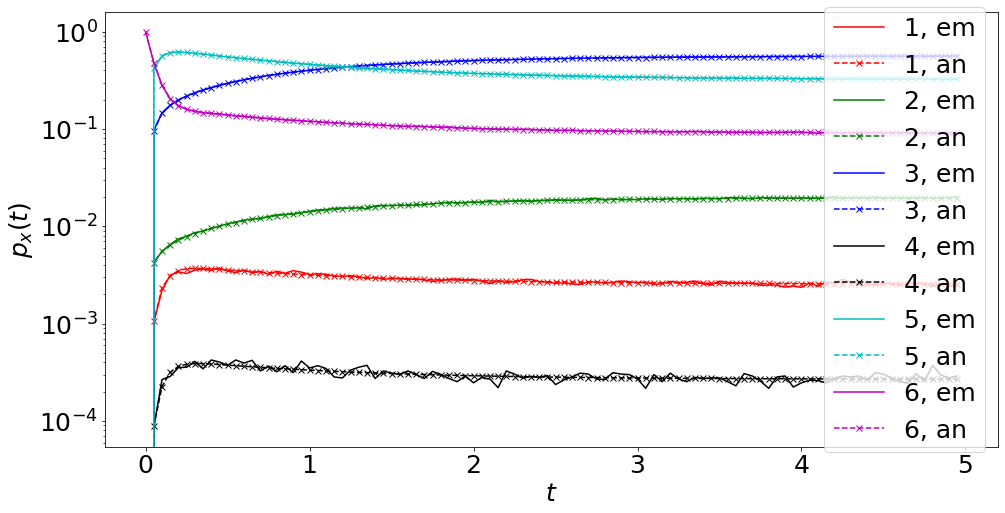

In [47]:
fig = plt.figure(figsize=(16, 8))

plt.plot(t, p[:, 0], "r-", label="1, em")
plt.plot(t, analytic[:, 0], "r--x", label="1, an")


plt.plot(t, p[:, 1], "g-", label="2, em")
plt.plot(t, analytic[:, 1], "g--x", label="2, an")


plt.plot(t, p[:, 2], "b-", label="3, em")
plt.plot(t, analytic[:, 2], "b--x", label="3, an")


plt.plot(t, p[:, 3], "k-", label="4, em")
plt.plot(t, analytic[:, 3], "k--x", label="4, an")


plt.plot(t, p[:, 4], "c-", label="5, em")
plt.plot(t, analytic[:, 4], "c--x", label="5, an")


plt.plot(t, p[:, 5], "m-", label="6, em")
plt.plot(t, analytic[:, 5], "m--x", label="6, an")


plt.yscale("log")
plt.xlabel(r"$t$")
plt.ylabel(r"$p_x(t)$")
plt.legend(loc="right")



In [48]:
# d_matrix = np.array([[0, 1, 0, 1, 1, 0], [-1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 1], [0, -1, 0, 0, -1, 0]])
d_matrix = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, -1], [0, 1, 0, 0, 1, 0]])

frame.printMatrix(d_matrix)


0.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   -1.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   -1.00   

0.00   1.00   0.00   0.00   1.00   0.00   



In [49]:
def empirical_current_timeindependent(traj, d_matrix, traj_time, maxtime=10):
    J = np.zeros(len(traj))
    
    for k in range(len(traj)):
        for i in range(len(traj[k])-1):
            # print(k, i, len(traj_time), len(traj_time[k]), len(traj[k]))
            if traj_time[k][i] < maxtime:
                # print(traj[k][i]-1, traj[k][i+1]-1)       
                J[k] += d_matrix[traj[k][i]-1, traj[k][i+1]-1]
                
    return J

def analytic_mean_current(d_matrix, L, final_time, number_times):
    """_summary_

    Args:
        d_matrix (_type_): d matrix
        L (_type_): master operator
        final_time (_type_): final time
        number_times (_type_): number of time steps 

    Returns:
        _type_: _description_
    """ 

    dt = final_time / number_times

    avg_J = 0

    for m in range(number_times):
        p_an = system.master_eq_evolution(m*dt)
        
        for i in range(len(p_an)):
            for j in range(len(p_an)):
                if i != j:
                    avg_J += dt * p_an[i] * d_matrix[i, j] * L[j, i]


    return avg_J


def analyt_entropy(L, final_time, number_times, Adj):

    dt = final_time / number_times

    S = 0

    for m in range(number_times):
        p_an = system.master_eq_evolution((m+1)*dt)
        
        for i in range(len(p_an)):
            for j in range(len(p_an)):
                if Adj[i, j] == 1:
                    S += dt * p_an[i] *  L[j, i] * np.log((p_an[i] *  L[j, i]) / (p_an[j] *  L[i, j]))

    return S


In [50]:
Jcurr = empirical_current_timeindependent(trajectories, d_matrix, trajectory_times, 1.5)

k = np.where(np.array(trajectory_times[0]) < 1.5)

print(Jcurr[0])
print(np.array(trajectories[0])[k])
print(np.array(trajectory_times[0])[k])



# print(np.mean(Jcurr), analytic_mean_current(d_matrix, L, 2, 200))

# plt.hist(Jcurr)
# print(np.histogram(Jcurr))
# print(100 / 5000)

# plt.bar(x = np.arange(1, 7), height=system.master_eq_evolution(0.1))

1.0
[6 5 6 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 6 5 6 2 3 2 3]
[0.         0.005874   0.3040309  0.3647651  0.36509957 0.37253969
 0.37266549 0.39825456 0.39897669 0.41187676 0.41210952 0.47409098
 0.47448694 0.47852249 0.47859123 0.48343403 0.48442003 0.49946061
 0.50061748 0.50365035 0.50438018 0.51083714 0.51112055 0.54676354
 0.54851644 0.57753425 0.58186813 0.5855315  0.58648861 0.6046943
 0.60498097 0.62547984 0.62558232 0.63113073 0.63114633 0.64643761
 0.64649288 0.65223604 0.6524986  0.68233578 0.68328899 0.77890959
 0.7795092  0.78122897 0.78180534 1.09329079 1.45264259 1.46534187
 1.46635978 1.46649432 1.46677451]


In [51]:
A = np.array([[0, 1, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0]])


print(analyt_entropy(L, 10, 10000, A) / 2, np.mean(Jcurr) ** 2 /np.var(Jcurr), np.mean(Jcurr), np.var(Jcurr))

1.1691842623221913 1.5381354856722256 0.60601 0.2387618799


In [52]:
def test_plot(A, L, d_matrix, number_different_sample=5, maximal_time=10, number_timesteps=100, trajectories_per_sample=100):
    J_mean_emp = np.zeros((number_different_sample, number_timesteps-1))
    J_var_emp = np.zeros((number_different_sample, number_timesteps-1))
    J_mean_an = np.zeros(number_timesteps-1) 
    Entropy = np.zeros(number_timesteps-1)

    dJ_mean_emp = np.zeros((number_different_sample, number_timesteps-2))
    dJ_mean_an = np.zeros(number_timesteps-2)

    dt = maximal_time / number_timesteps

    time = []

    # take different realisations 
    for i in range(number_different_sample):
        trajectories = []
        trajectory_times = []

        # sample trajectories in each realisation
        for j in range(trajectories_per_sample):
            traj = system.Trajectory_sample(maximal_time)
            trajectories.append(traj[0])
            trajectory_times.append(traj[1])
            # print(np.shape(traj[0]), np.shape(traj[1]))
        
        for t in range(1, number_timesteps):
            Jc = empirical_current_timeindependent(trajectories, d_matrix, trajectory_times, t*dt)
            J_mean_emp[i, t-1] = np.mean(Jc)
            #J_var_emp[i, t-1] = np.var(Jc)

            if i == 0:
                J_mean_an[t-1] = analytic_mean_current(d_matrix, L, t*dt, 1000)
                # Entropy[t-1] = analyt_entropy(L, t*dt, 1000, A)
                time.append(t*dt)

        print(i)

    for i in range(number_different_sample):
        dJ_mean_emp[i][:] = (J_mean_emp[i, 1:] - J_mean_emp[i, :-1])/dt
        dJ_mean_an[:] = (J_mean_an[1:] - J_mean_an[:-1])/dt

    return J_mean_an, J_mean_emp, time#, J_var_emp, Entropy, dJ_mean_an, dJ_mean_emp

        


In [53]:
d_matrix = np.array([[0, 1, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])

frame.printMatrix(d_matrix)

J_mean_an, J_mean_emp, time = test_plot(A, L, d_matrix, 1, tmax, 200, 5000)
# J_mean_an, J_mean_emp, J_var_emp, Entropy, dJ_mean_an, dJ_mean_emp, time = test_plot(A, L, d_matrix, 5, 10, 200, 1000)

0.00   1.00   0.00   0.00   0.00   0.00   

-1.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0


In [57]:
from numba import jit
# @jit
def empirical_current_timeindependent_2(traj, d_matrix, traj_time, maxtime=10, size=200):
    N = len(traj)
    J = np.zeros((N, size-1))
    
    dt = maxtime / size
    for k in range(N):
        if k%1000 == 0:
            print(k)
        for s in range(1, size):
            ind = np.where(np.array(traj_time[k]) < dt * s)[0]
            # print(ind, ind+1, len(traj[k]))
            if len(ind) > 1 and len(ind) < len(traj[k]):
                k1 = np.array(traj[k])[ind]-1
                k2 = np.array(traj[k])[ind+1]-1
                #print(k1, k2)
                #print(np.array(traj[k])[ind+1]-1, len(np.array(traj[k])[ind+1]-1))
                #print(d_matrix[np.array(traj[k])[ind+1]-1])
                J[k, s-1] += np.sum(d_matrix[k1, k2])
            #if k == 0:
            #    print(tra_val)
            #    print(np.array(traj[k])[ind])
            #    print(d_matrix[np.array(traj[k])[ind]-1, np.array(traj[k])[ind+1]-1])
            #    print(np.array(traj_time[k])[ind], dt * s)
            #    print("***********************************************")
            

    mean_J = np.zeros(size-1)
    var_J = np.zeros(size-1)
    for i in range(size - 1):
        mean_J[i] = np.mean(J[:, i])
        var_J[i] = np.std(J[:, i])
    return J, mean_J, var_J



Jtest2, Jtest2_mean, Jtest2_var = empirical_current_timeindependent_2(trajectories, d_matrix=d_matrix, traj_time=trajectory_times, maxtime=tmax, size=200)


#Jtest = []
#for t in time:
#    Jtest.append(np.mean(empirical_current_timeindependent(trajectories, d_matrix, trajectory_times, t)))



0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


[6.33333333e-05 1.96666667e-04 4.60000000e-04 7.40000000e-04
 1.03333333e-03 1.43000000e-03 1.81666667e-03 2.21333333e-03
 2.59333333e-03 2.90333333e-03 3.28333333e-03 3.73000000e-03
 4.16333333e-03 4.53333333e-03 4.93000000e-03 5.23333333e-03
 5.66000000e-03 5.99000000e-03 6.35333333e-03 6.66000000e-03
 6.96333333e-03 7.20333333e-03 7.48000000e-03 7.72666667e-03
 8.03666667e-03 8.24000000e-03 8.51000000e-03 8.71000000e-03
 9.00333333e-03 9.29666667e-03 9.58333333e-03 9.82666667e-03
 1.00700000e-02 1.03433333e-02 1.05333333e-02 1.07666667e-02
 1.10133333e-02 1.11833333e-02 1.14166667e-02 1.16466667e-02
 1.17733333e-02 1.18900000e-02 1.21066667e-02 1.22333333e-02
 1.24166667e-02 1.26100000e-02 1.27700000e-02 1.29500000e-02
 1.30433333e-02 1.31933333e-02 1.34266667e-02 1.36266667e-02
 1.38000000e-02 1.39366667e-02 1.40500000e-02 1.42066667e-02
 1.42833333e-02 1.44166667e-02 1.46566667e-02 1.48033333e-02
 1.49166667e-02 1.50300000e-02 1.50533333e-02 1.51233333e-02
 1.52400000e-02 1.530666

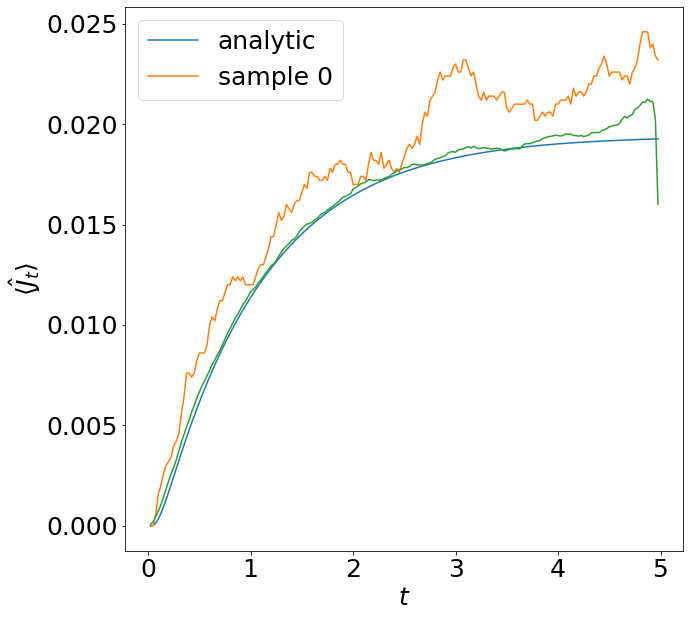

In [59]:
print((Jtest2_mean))
fig = plt.figure(figsize=(10, 10))


plt.plot(time, J_mean_an, label="analytic")
for i in range(1):
    plt.plot(time, J_mean_emp[i], label="sample %d" %i)
plt.plot(time, Jtest2_mean)
#plt.fill_between(time, Jtest2_mean-Jtest2_var, Jtest2_mean+Jtest2_var,
#    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

plt.xlabel(r"$t$")
plt.ylabel(r"$\langle \hat{{J}}_t\rangle$")
plt.legend()

In [37]:
Entropy = []
for t in time:
    Entropy.append( analyt_entropy(L, t, 1000, A))

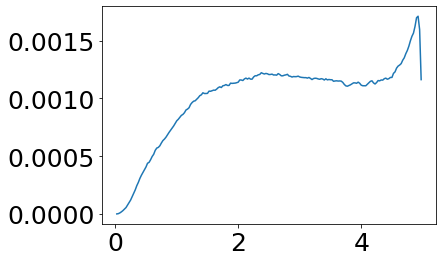

In [40]:
dJmean = (Jtest2_mean[1:] - Jtest2_mean[:-1])/(time[1]-time[0])

plt.plot(time, 2*Jtest2_mean**2 / (Jtest2_var*Entropy))


In [190]:
print(Jtest)

[0.0002, 0.001, 0.0021, 0.0033, 0.004, 0.0052, 0.0063, 0.0072, 0.0077, 0.0081, 0.0086, 0.0094, 0.0097, 0.0105, 0.0105, 0.0108, 0.0112, 0.0112, 0.011, 0.0119, 0.0124, 0.0123, 0.0125, 0.0128, 0.0127, 0.0126, 0.0122, 0.0121, 0.0129, 0.0133, 0.014, 0.0141, 0.0142, 0.0143, 0.014, 0.0142, 0.0141, 0.0142, 0.014, 0.0139, 0.0135, 0.0135, 0.0138, 0.0141, 0.0141, 0.0142, 0.0147, 0.0147, 0.0152, 0.0155, 0.0153, 0.0151, 0.0149, 0.015, 0.015, 0.0151, 0.0155, 0.0157, 0.015, 0.015, 0.0148, 0.0153, 0.0154, 0.0151, 0.0149, 0.0151, 0.0151, 0.015, 0.0144, 0.0143, 0.0146, 0.0149, 0.0153, 0.0155, 0.0155, 0.015, 0.0146, 0.0146, 0.015, 0.0146, 0.015, 0.0155, 0.0152, 0.0157, 0.015, 0.015, 0.0151, 0.0154, 0.0156, 0.0158, 0.0156, 0.0154, 0.0158, 0.0164, 0.0165, 0.0166, 0.0164, 0.0163, 0.0162, 0.0158, 0.0159, 0.0159, 0.0161, 0.0162, 0.0161, 0.0168, 0.0167, 0.0175, 0.0178, 0.0175, 0.0177, 0.0173, 0.0173, 0.0173, 0.0176, 0.0179, 0.0177, 0.0181, 0.0179, 0.0183, 0.018, 0.0186, 0.0187, 0.019, 0.0199, 0.0196, 0.0192, 0

In [116]:
d_matrix = np.array([[0, 1, 0, 1, 1, 0], [-1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])

frame.printMatrix(d_matrix)

J_mean_an1, J_mean_emp1, J_var_emp1, Entropy1, dJ_mean_an1, dJ_mean_emp1, time1 = test_plot(A, L, d_matrix, 5, 10, 200, 1000)

0.00   1.00   0.00   1.00   1.00   0.00   

-1.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

-1.00   0.00   0.00   0.00   0.00   0.00   

-1.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0
1
2
3
4


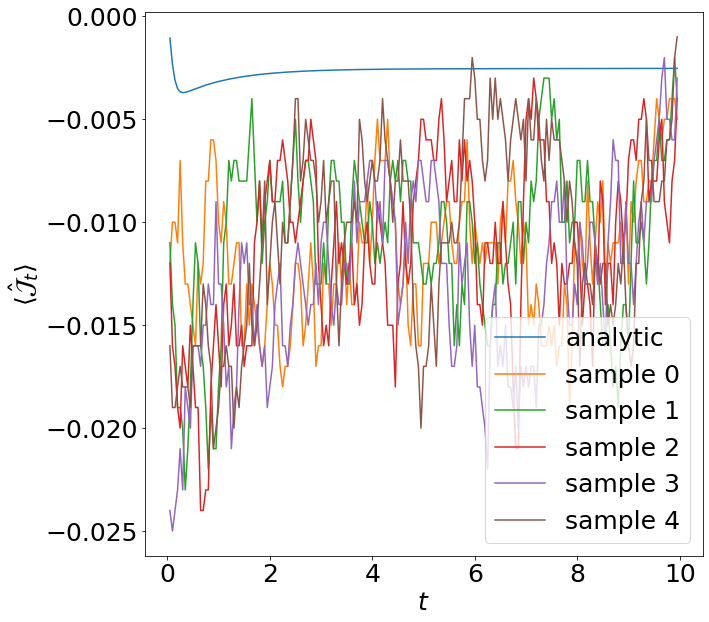

In [117]:
fig = plt.figure(figsize=(10, 10))


plt.plot(time, J_mean_an1, label="analytic")
for i in range(5):
    plt.plot(time, J_mean_emp1[i], label="sample %d" %i)


plt.xlabel(r"$t$")
plt.ylabel(r"$\langle \hat{\mathcal{J}}_t\rangle$")
plt.legend()

In [121]:
d_matrix = np.array([[0, 1, 0, 1, 1, 0], [-1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])

frame.printMatrix(d_matrix)

J_mean_an2, J_mean_emp2, J_var_emp2, Entropy2, dJ_mean_an2, dJ_mean_emp2, time2 = test_plot(A, L, d_matrix, 5, 10, 200, 200)

0.00   1.00   0.00   1.00   1.00   0.00   

-1.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

-1.00   0.00   0.00   0.00   0.00   0.00   

-1.00   0.00   0.00   0.00   0.00   0.00   

0.00   0.00   0.00   0.00   0.00   0.00   

0
1
2
3
4


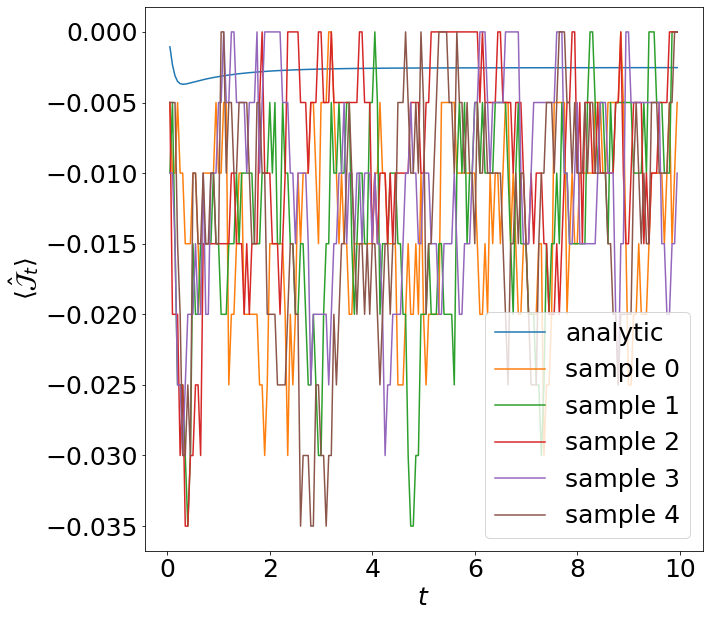

In [122]:
fig = plt.figure(figsize=(10, 10))


plt.plot(time, J_mean_an2, label="analytic")
for i in range(5):
    plt.plot(time, J_mean_emp2[i], label="sample %d" %i)


plt.xlabel(r"$t$")
plt.ylabel(r"$\langle \hat{\mathcal{J}}_t\rangle$")
plt.legend()